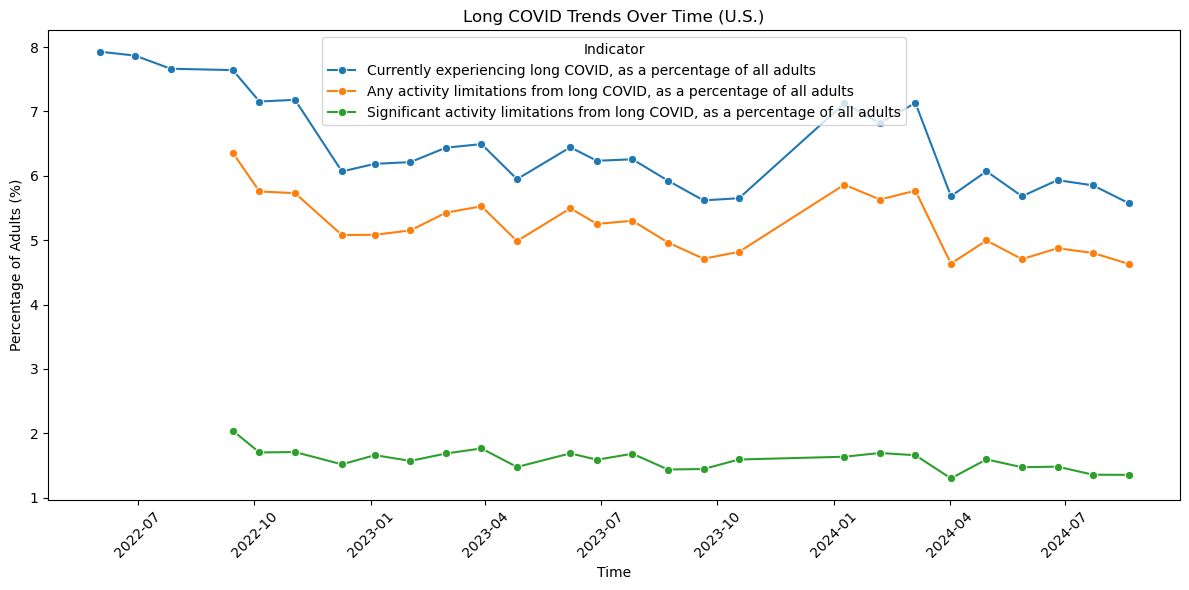

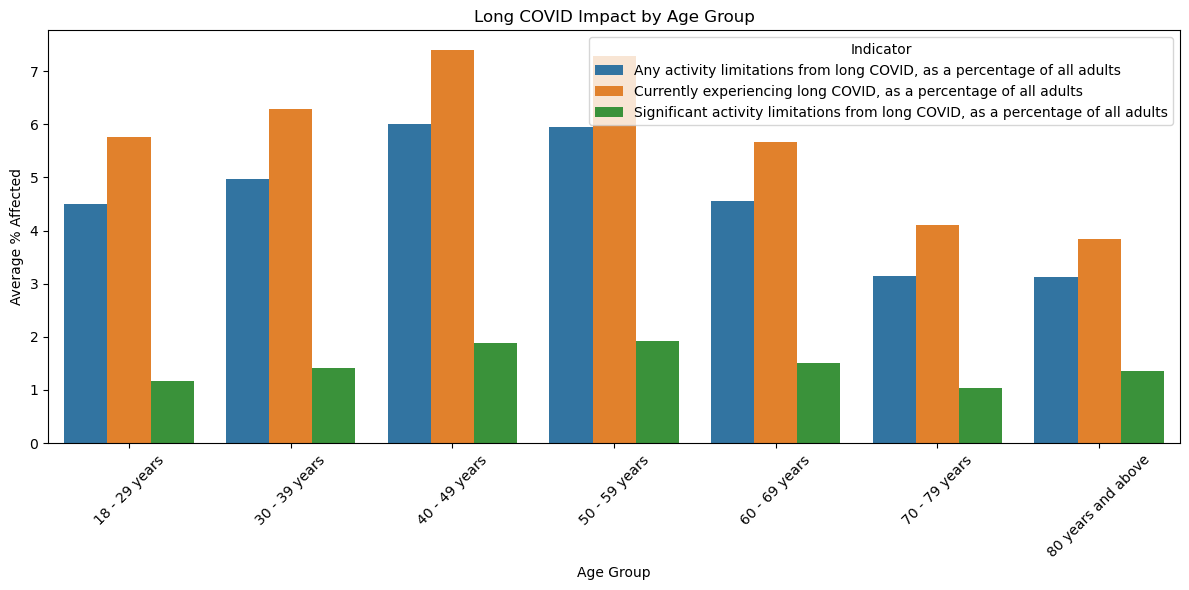

In [13]:
#Long Term COVID-19 Symptom Analysis by Kimberley Washington

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inside the notebook
%matplotlib inline

# Dataset
df = pd.read_csv("file:///Users/kimberleywashington/Downloads/Post-COVID_Conditions.csv")

# Checking the first few rows to see the columns
df.head()

# Show full text of all indicator types - 'display.max_colwidth' shows the entire text
pd.set_option('display.max_colwidth', None)
df2['Indicator'].unique()

# Filtering 3-key long COVID indicators - these are what I'm analyzing, the limitations fall in the symptoms category
long_covid_df = df[df["Indicator"].isin([
    "Currently experiencing long COVID, as a percentage of all adults",
    "Any activity limitations from long COVID, as a percentage of all adults",
    "Significant activity limitations from long COVID, as a percentage of all adults"
])]

long_covid_df.head() #get the first few rows

#To generate and display a line chart(trends over time)

#Convert date column to datetime
long_covid_df.loc[:, "Time Period Start Date"] = pd.to_datetime(long_covid_df["Time Period Start Date"])

# Group by date and indicator, and get the average value
trend = long_covid_df.groupby(["Time Period Start Date", "Indicator"])["Value"].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend, x="Time Period Start Date", y="Value", hue="Indicator", marker="o")

plt.title("Long COVID Trends Over Time (U.S.)")
plt.ylabel("Percentage of Adults (%)")
plt.xlabel("Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#To generate and display a bar chart(group by age)

# Filter for "By Age" data only
age_data = long_covid_df[long_covid_df["Group"] == "By Age"]

# Group by age group and indicator
age_grouped = age_data.groupby(["Subgroup", "Indicator"])["Value"].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=age_grouped, x="Subgroup", y="Value", hue="Indicator")

plt.title("Long COVID Impact by Age Group")
plt.ylabel("Average % Affected")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()